**Sentiment Analysis of IMDB Movie Reviews**

**Problem Statement:**

In this, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

**Import necessary libraries**

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
#print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')


**Import the IMDB dataset**

In [2]:
#importing the training data
imdb_data = pd.read_csv('IMDB Dataset.csv')
print (imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


**Exploratery data analysis**

In [3]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


**Sentiment count**

In [4]:
#sentiment count
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

We can see that the dataset is balanced.

**Spliting the training dataset**

In [5]:
#split the dataset  
#train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


**Text normalization**

In [6]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#### Adding more stop words to the nltk stop words list

In [7]:
additional_stop_words_list = ['stuff', 'start', 'music', 'odd', 'documentary', 'guy', 'cool', 'mind', 
                            'innoc', 'film', 'message', 'm', 'impress', 'course', 'hate', 'movie', 'only', 
                            'minute', 'crimin', 'sequenc', 'whi', 'becaus', 'peopel', 'thing', 'turn', 
                            'director', 'kid', 'danc', 'line', 'level', 'tri', 't', 'veri', 'goe', 'effort', 
                            'succe', 'standard', 'predict', 'year', 'tom', 'look', 'everyth', 'rate', 
                            'import', 'easi', 'use', 'creatur', 'tourist', 'meanwhil', 'secur', 'center', 
                            'pre', 'hardl', 'group', 'gore', 'hair', 'scare', 'stori', 'provid', 'gener', 
                            'becom', 'actor', 'realist', 'r', 'angel', 'david', 'curti', 'pictur', 'badli', 
                            'previou', 'televis', 'journey', 'man', 'assum', 'didn', 'care', 'cultur', 
                            'song', 'strike', 'disast', 'score', 'question', 'matter', 'decid', 'titl', 
                            'kind', 'face', 'sometim', 'couldn', 'mountain', 'juli', 'sort', 'review', 
                            'credit', 'fear', 'dialog', 'pervert', 'cover', 'sister', 'body', 'judge', 
                            'parent', 'plot', 'twist', 'bonker', 'reason', 'mouth', 'chick', 'fall', 
                            'survive', 'rest', 'locate', 'harri', 'brother', 'do']

stopword_list.extend(additional_stop_words_list)

**Removing html strips and noise text**

In [8]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
imdb_data['review']=imdb_data['review'].apply(denoise_text)

**Removing special characters**

In [9]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

**Text stemming
**

In [10]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

**Removing stopwords**

In [11]:
stop=set(stopwords.words('english'))
print(stop)

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{"didn't", 'each', 'shan', 'those', 'doing', 'so', "won't", 'ours', 'too', 'were', 's', 'with', 'few', 'any', 'same', 'did', 'their', 'we', 'out', "haven't", "wasn't", 'won', 'after', 'not', 'myself', 'am', 'have', 'a', "should've", 'it', "you're", 'hadn', 'here', 'they', 'can', 'where', 'just', 'd', "you'll", 'both', 'some', 'only', 'yourself', 'if', 'on', 'your', 'under', 'below', 'her', 'isn', 'having', "needn't", 'do', 'should', 'but', 'between', 'in', 'now', 're', 'y', 'and', 'are', 'him', 'until', 'doesn', 'wouldn', 'hers', 'how', 'through', 'herself', 'other', 'yourselves', 'such', 'wasn', 'as', 'mightn', 'has', 'when', 'she', 'what', 'from', 'before', 'being', 'by', 'themselves', 'yours', 'there', "aren't", 'that', 'hasn', "isn't", "couldn't", 'down', "hadn't", 'haven', 'll', "wouldn't", 'he', 'why', "hasn't", 'm', "you'd", 'at', 'about', 'these', 'been', 'to', "doesn't", 'my', 'which', 'be', 'i', 'its', 'couldn', 'against', 'for', 'will', 'didn', 'shouldn', 'needn', 'most', 'o

**Normalized train reviews**

In [12]:
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[2]

'thought thi wa wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz thi match point 2 risk addict thought wa proof woodi allen still fulli control style mani us grown lovethi wa id laugh one woodi comedi dare say decad ive never scarlet johanson thi manag tone sexi imag jump right averag spirit young womanthi may crown jewel hi career wa wittier devil wear prada interest superman great comedi go see friend'

**Normalized test reviews**

In [13]:
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[40001]

'wa excit see sitcom would hope repres indian candian found thi show funni produc cast probabl happi get bad good feed back far concern get talk wa readi stereotyp problem stereotyp exist usual true realli wasnt anyth funni stereotyp charact fresh boat dad doesnt understand hi daughter radic feminist muslim daughter way terribl actress young modern indian run hi mosqu polit correct pretti good onli see get betterit contriv doesnt flow well wa much potenti someth like thi sadli think fail dont realli watch anoth episodei howev enjoy watch great canadian actress sheila mccarthi alway treat natur doe bad daughter show doesnt act abil'

**Bags of words model **

It is used to convert text documents to numerical vectors or bag of words.

In [14]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 5924608)
BOW_cv_test: (10000, 5924608)


**Term Frequency-Inverse Document Frequency model (TFIDF)**

It is used to convert text documents to  matrix of  tfidf features.

In [15]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3),stop_words=stopword_list)
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 5924591)
Tfidf_test: (10000, 5924591)


**Labeling the sentiment text**

In [16]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


**Split the sentiment tdata**

In [17]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


**Modelling the dataset using K Nearest Neighbor model **

Let us build K Nearest Neighbor model for both bag of words and tfidf features and print the accuracy, confusion matrix and classification report of each feature set

In [18]:
k_neghbors_classifier = KNeighborsClassifier(n_neighbors=10)

k_neghbors_classifier_bow = k_neghbors_classifier.fit(cv_train_reviews, train_sentiments)
k_neghbors_classifier_bow_predict = k_neghbors_classifier.predict(cv_test_reviews)
print('The accuracy score of bag of words is:',accuracy_score(test_sentiments, k_neghbors_classifier_bow_predict))
print('The confusion matrix of bag of words is:','\n',confusion_matrix(test_sentiments, k_neghbors_classifier_bow_predict))
print('The classification report of bag of words is:','\n',classification_report(test_sentiments, k_neghbors_classifier_bow_predict,target_names=['Positive','Negative']))


k_neghbors_classifier_tfidf = k_neghbors_classifier.fit(tv_train_reviews,train_sentiments)
k_neghbors_classifier_tfidf_predict = k_neghbors_classifier.predict(tv_test_reviews)
print('The accuracy score of tf_idf is:',accuracy_score(test_sentiments, k_neghbors_classifier_tfidf_predict))
print('The confusion matrix of tf_idf  is:','\n',confusion_matrix(test_sentiments, k_neghbors_classifier_tfidf_predict))
print('The classification report of tf_idf is:','\n',classification_report(test_sentiments, k_neghbors_classifier_tfidf_predict,target_names=['Positive','Negative']))

The accuracy score of bag of words is: 0.4991
The confusion matrix of bag of words is: 
 [[4975   18]
 [4991   16]]
The classification report of bag of words is: 
               precision    recall  f1-score   support

    Positive       0.50      1.00      0.67      4993
    Negative       0.47      0.00      0.01      5007

    accuracy                           0.50     10000
   macro avg       0.48      0.50      0.34     10000
weighted avg       0.48      0.50      0.34     10000

The accuracy score of tf_idf is: 0.4979
The confusion matrix of tf_idf  is: 
 [[4835  158]
 [4863  144]]
The classification report of tf_idf is: 
               precision    recall  f1-score   support

    Positive       0.50      0.97      0.66      4993
    Negative       0.48      0.03      0.05      5007

    accuracy                           0.50     10000
   macro avg       0.49      0.50      0.36     10000
weighted avg       0.49      0.50      0.36     10000



**Let us see positive and negative words by using WordCloud.**

**Word cloud for positive review words**

<function matplotlib.pyplot.show(close=None, block=None)>

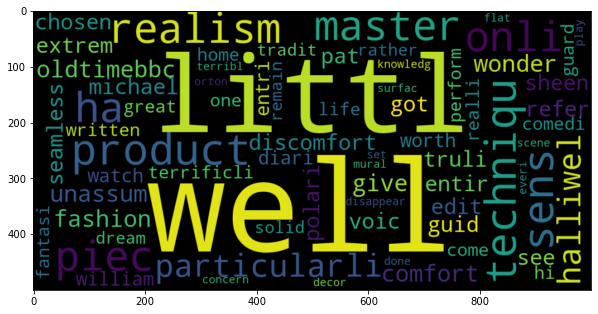

In [19]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

**Word cloud for negative review words**

<function matplotlib.pyplot.show(close=None, block=None)>

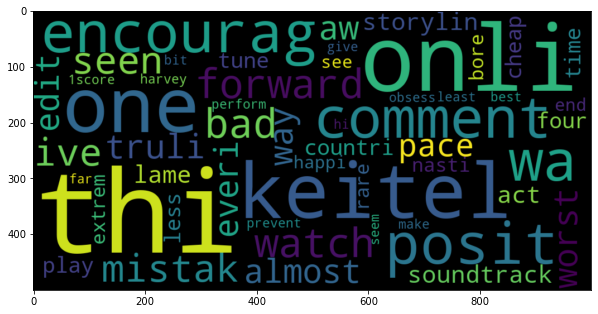

In [20]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

**Conclusion:**
* We can observed that both logistic regression and multinomial naive bayes model performing well compared to linear support vector  machines.
* Still we can improve the accuracy of the models by preprocessing data and by using lexicon models like Textblob.

## Using Word2Vec Model

### Import Spark to read the csv

In [21]:
import os

# Setting Configurations - JAVA_HOME and SPARK_HOME Variable

os.environ["JAVA_HOME"] = r"C:\Java\jdk1.8.0_331"
os.environ["SPARK_HOME"] = r"C:\BigDataLocalSetup\spark"

### Creating a Spark Context

In [22]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [23]:
# Read csv file using spark

df = spark.read.csv("IMDB Dataset.csv")

In [24]:
df = spark.read.csv("IMDB Dataset.csv")
#print (df)

reviews = [row["_c0"] for row in df.collect()]
reviews = reviews[1::]
#print (reviews[:10:])

labels = [row["_c1"] for row in df.collect()]
labels = labels[1::]

new_lables = []
for label in labels:
    if label == "positive":
        new_lables.append(1)
    else:
        new_lables.append(0)

labels = new_lables
#print (labels[:10:])

print (len(labels), len(reviews))


50000 50000


### parsing html

In [25]:
from bs4 import BeautifulSoup
import re

def parseHtml(html):
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text()

def removeDigits(word):
    result = word
    for i in range(10):
        result = result.replace(str(i),' ')
    return result

reviews=list(map(parseHtml, reviews))  # In order to remove html
reviews=list(map(removeDigits, reviews))  # In order to remove digits

In [26]:
#tokenizing
import nltk
nltk.download('punkt')
tokenizedText=[nltk.word_tokenize(item) for item in reviews]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pvenna2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
#removing punctuation
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
tokenizedText= [[word for word in review if word not in punc] for review in tokenizedText]

### Splitting the dataset into train and test set

In [28]:
totalRows=np.shape(tokenizedText)[0]
splitRatio=0.70
splitPoint=int(splitRatio*totalRows)
trainReviews=tokenizedText[:splitPoint]
trainLabels=labels[:splitPoint]
testReviews=tokenizedText[splitPoint:]
testLabels=labels[splitPoint:]

### Create word embeddings on training data using Gensim library

In [29]:
!pip install gensim
from gensim.models import Word2Vec, KeyedVectors
import nltk

embeddingsSize=128
model=Word2Vec(trainReviews, vector_size=embeddingsSize, window=5, min_count=1, workers=4)
print ("Training of Word Embeddings Vector using Gensim Successfully Completed")

Training of Word Embeddings Vector using Gensim Successfully Completed


In [30]:
import numpy as np
def getVectors(dataset):
    singleDataItemEmbedding = np.zeros(embeddingsSize)
    vectors = []
    for dataItem in dataset:
        wordCount = 0
        for word in dataItem:
            if word in model.wv:
                #print (word)
                singleDataItemEmbedding = singleDataItemEmbedding+model.wv[word]
                wordCount += 1
  
        singleDataItemEmbedding = singleDataItemEmbedding/wordCount  
        vectors.append(singleDataItemEmbedding)
    return vectors

trainReviewVectors = getVectors(trainReviews)
testReviewVectors = getVectors(testReviews)

### Displaying the accuracy, F1-score, label-wise precision, recall, etc.

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score

def print_results(y_actual, y_predicted):
    print("Accuracy= ", accuracy_score(y_actual, y_predicted))
    columns=['false', 'true']
    precision, recall, fscore, support = score(y_actual, y_predicted)
    print('precision: {}'.format(precision))  
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    print('Macro F1 ',f1_score(y_actual, y_predicted, average='macro'))
    print('Micro F1 ', f1_score(y_actual, y_predicted, average='micro'))

In [32]:
#neural network
from sklearn.neural_network import MLPClassifier

clfMLP = MLPClassifier(hidden_layer_sizes=(10, 10, 10))
clfMLP.fit(trainReviewVectors, trainLabels)
  
testLabelsPredicted=list(clfMLP.predict(testReviewVectors))

#print results
print("####################RESULTS OF NEURAL NETWORK CLASSIFIER##################")
print_results(testLabelsPredicted, testLabels)

####################RESULTS OF NEURAL NETWORK CLASSIFIER##################
Accuracy=  0.8850666666666667
precision: [0.93409824 0.76897171]
recall: [0.90542279 0.83131068]
fscore: [0.91953701 0.79892699]
support: [10880  4120]
Macro F1  0.8592319998390476
Micro F1  0.8850666666666667
